<a href="https://colab.research.google.com/github/anmol192/CMSR-Android-API/blob/main/ZeltaLabsBTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from ta.trend import EMAIndicator
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from sklearn.impute import SimpleImputer

In [7]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=8b5410cd2c70196665a6da6de129c3402e9d8baf031c0654c75a4f8aef5cf223
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


# Load your BTC price data (replace 'your_data.csv' with the actual file path)

In [3]:
data = pd.read_csv('/content/sample_data/btc_6h.csv')

# Convert the Date column to datetime type

In [4]:
data['Date'] = pd.to_datetime(data['datetime'])

# Extract numeric features from the Date column

In [5]:
data['Numeric_Date'] = (data['Date'] - data['Date'].min()).dt.days

# Calculate EMA with a specified window

In [9]:
ema_window = 20
data['EMA'] = EMAIndicator(close=data['close'], window=ema_window).ema_indicator()

# Calculate Bollinger Bands

In [10]:
bollinger_window = 20
bb = BollingerBands(close=data['close'], window=bollinger_window)
data['BB_upper'] = bb.bollinger_lband()
data['BB_lower'] = bb.bollinger_hband()

# Calculate RSI with a specified window

In [11]:
rsi_window = 14
data['RSI'] = RSIIndicator(close=data['close'], window=rsi_window).rsi()

# Define features and target variable

In [12]:
features = ['Numeric_Date', 'EMA', 'BB_upper', 'BB_lower', 'RSI']

# Add more features as needed

In [13]:
target = 'close'

# Replace missing values with the mean of each column

In [14]:
imputer = SimpleImputer(strategy='mean')
data[features] = imputer.fit_transform(data[features])

# Split the data into training and test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)


# Assuming 'Close' represents the closing price of BTC in USD # Initial closing price in USD

In [16]:
initial_btc_price = y_test.values[0]

# Create a pipeline with StandardScaler and Regularized Random Forest Regressor

In [17]:
model = make_pipeline(StandardScaler(), RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=42))

# Train the model on the training data

In [18]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, min_samples_split=5,
                                       random_state=42))])

# Make predictions on the test data

In [19]:
y_pred = model.predict(X_test)


# Calculate Mean Squared Error

In [20]:
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error

In [21]:
rmse = np.sqrt(mse)

# Print or use the RMSE as needed

In [22]:
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 314.98556821503206


# Implement the rest of your code for visualization and metrics as before...

In [23]:
imputer = SimpleImputer(strategy='mean')
data[features] = imputer.fit_transform(data[features])

# Split the data into training and test sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and Random Forest Regressor

In [25]:
model = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

# Train the model on the training data

In [26]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

# Make predictions on the test data

In [27]:
y_pred = model.predict(X_test)

# Implement dynamic stop-loss as a percentage of the current predicted price # Adjust as needed

In [28]:
stop_loss_percentage = 0.01

# Counter for stop-loss hits

In [29]:
stop_loss_hits = 0

# Visualize the results with subplots using GridSpec

In [30]:
fig = plt.figure(figsize=(12, 10))
gs = GridSpec(3, 1, height_ratios=[2, 1, 1], hspace=0.4)

<Figure size 1200x1000 with 0 Axes>

# Plot the actual BTC prices


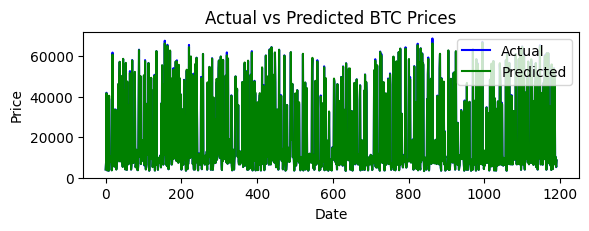

In [50]:
ax0 = plt.subplot(gs[0])
ax0.plot(y_test.values, label='Actual', color='blue')
ax0.plot(y_pred, label='Predicted', color='green')
ax0.set_title('Actual vs Predicted BTC Prices')
ax0.set_xlabel('Date')
ax0.set_ylabel('Price')
ax0.legend()

# Plot EMA, Bollinger Bands, and RSI

In [31]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# Plot EMA

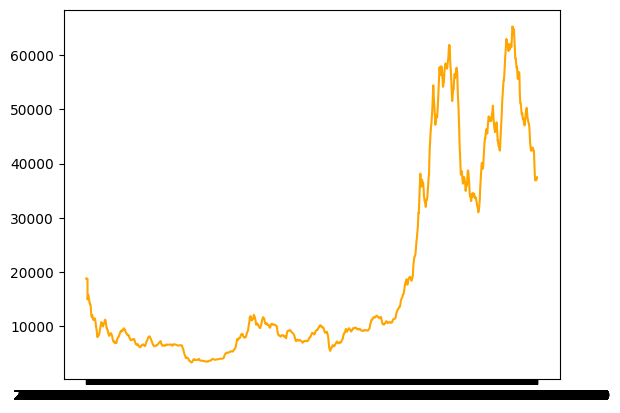

In [32]:
plt.plot(data['datetime'], data['EMA'], label='EMA', color='orange')

# Plot Bollinger Bands

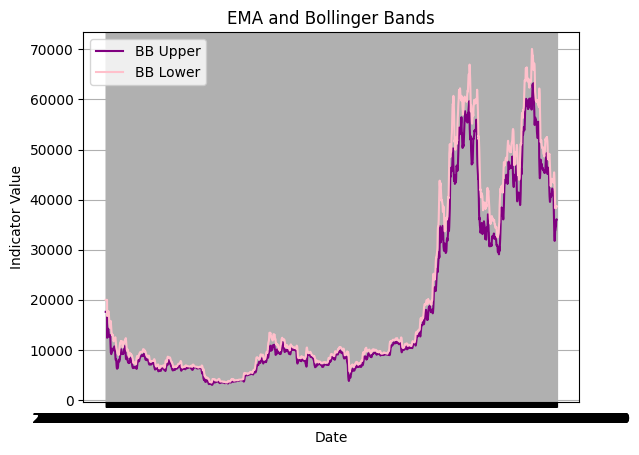

In [33]:
plt.plot(data['datetime'], data['BB_upper'], label='BB Upper', color='purple')
plt.plot(data['datetime'], data['BB_lower'], label='BB Lower', color='pink')
plt.title('EMA and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Indicator Value')
plt.legend()
plt.grid(True)

# Plot RSI

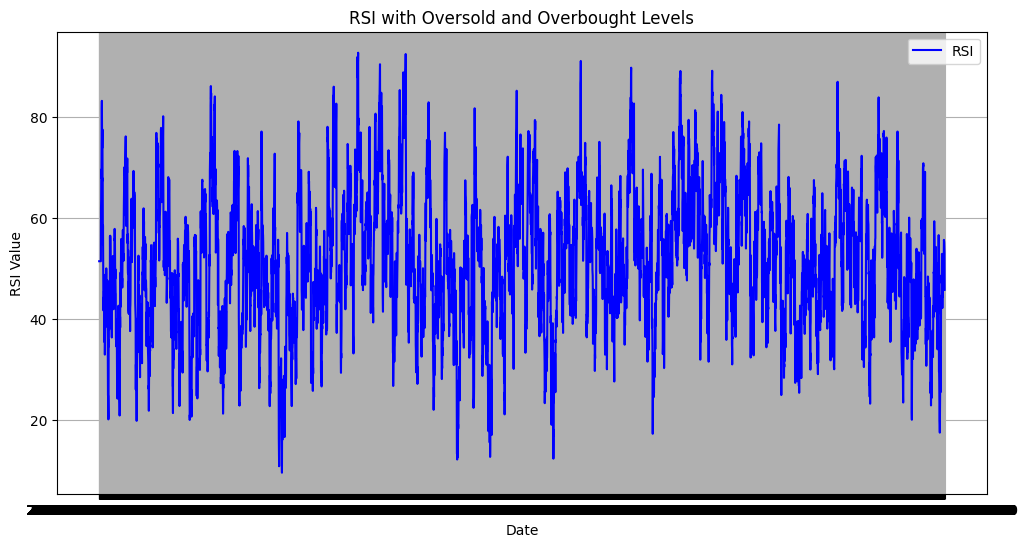

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['RSI'], label='RSI', color='blue')
plt.title('RSI with Oversold and Overbought Levels')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)

# Add horizontal lines for oversold and overbought levels

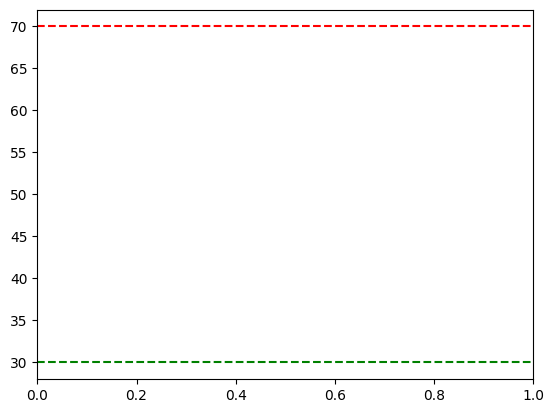

In [35]:
oversold_level = 30
overbought_level = 70
plt.axhline(y=oversold_level, color='green', linestyle='--', label=f'Oversold Level ({oversold_level})')
plt.axhline(y=overbought_level, color='red', linestyle='--', label=f'Overbought Level ({overbought_level})')

# Initialize variables for tracking the buying and selling points, as well as the total return

In [36]:
buy_point = None
total_return = 0.0

# Initialize variables for trade metrics

In [37]:
total_closed_trades = 0
gross_profit = 0.0
gross_loss = 0.0
winning_trades = 0
losing_trades = 0
max_drawdown = 0.0
largest_losing_trade = 0.0
largest_winning_trade = 0.0
total_holding_duration = 0  # in days
current_holding_duration = 0  # in days
max_dip = 0.0
average_dip = 0.0
return_at_sell_point = 0.0  # Initialize return_at_sell_point
buy_point = None
sell_point = None  # Add sell_point variable
total_return = 0.0

#  Loop through each prediction in the test set

for i in range(len(y_pred)):
    current_predicted_price = y_pred[i]

# Check if the actual price crosses below the dynamic stop-loss threshold

 # Check if it's a buying point

*   List item
*   List item



In [51]:
for i in range(len(y_pred)):
    current_predicted_price = y_pred[i]

    # Calculate dynamic stop-loss threshold
    dynamic_stop_loss_price = current_predicted_price * (1 - stop_loss_percentage)

    # Check if the actual price crosses below the dynamic stop-loss threshold
    if y_test.values[i] < dynamic_stop_loss_price:
        stop_loss_hits += 1
        # ... (previous code)

        # Check if it's a buying point
        if buy_point is None:
            buy_point = y_test.values[i]

    # Check if it's a selling point
    elif buy_point is not None and y_test.values[i] > dynamic_stop_loss_price:
        sell_point = y_test.values[i]
        return_at_sell_point = sell_point / buy_point - 1
        total_return += return_at_sell_point

        # Update trade metrics
        total_closed_trades += 1
        if return_at_sell_point > 0:
            winning_trades += 1
            gross_profit += return_at_sell_point * buy_point
            largest_winning_trade = max(largest_winning_trade, return_at_sell_point * buy_point)
        else:
            losing_trades += 1
            gross_loss += abs(return_at_sell_point * buy_point)
            largest_losing_trade = max(largest_losing_trade, abs(return_at_sell_point * buy_point))

        # Update holding duration metrics
        total_holding_duration += current_holding_duration
        current_holding_duration = 0

        buy_point = None

    # Check if it's a buying point based on some condition (example: RSI below a certain threshold)
    elif buy_point is None and data['RSI'].iloc[i] < 30:  # Adjust the condition as needed
        buy_point = y_test.values[i]

    # Update holding duration for each running trade
    if buy_point is not None:
        current_holding_duration += 1

    # Update max drawdown for each running trade
    max_dip = min(max_dip, return_at_sell_point)
    average_dip += return_at_sell_point

# ... (remaining code)

# Loop through each prediction in the test set
for i in range(len(y_pred)):
    current_predicted_price = y_pred[i]

    # Calculate dynamic stop-loss threshold
    dynamic_stop_loss_price = current_predicted_price * (1 - stop_loss_percentage)

    # Check if the actual price crosses below the dynamic stop-loss threshold
    if y_test.values[i] < dynamic_stop_loss_price:
        stop_loss_hits += 1
        # Plot the dynamic stop-loss threshold for each stop-loss hit
        ax0.plot([i, i + 1], [dynamic_stop_loss_price, dynamic_stop_loss_price], color='red', linestyle='--', label='Dynamic Stop Loss' if i == 0 else '')

        # Check if it's a buying point
        if buy_point is None:
            buy_point = y_test.values[i]

    # Check if it's a selling point
    elif buy_point is not None and y_test.values[i] > dynamic_stop_loss_price:
        sell_point = y_test.values[i]
        return_at_sell_point = sell_point / buy_point - 1
        total_return += return_at_sell_point

        # Update trade metrics
        total_closed_trades += 1
        if return_at_sell_point > 0:
            winning_trades += 1
            gross_profit += return_at_sell_point * buy_point
            largest_winning_trade = max(largest_winning_trade, return_at_sell_point * buy_point)
        else:
            losing_trades += 1
            gross_loss += abs(return_at_sell_point * buy_point)
            largest_losing_trade = max(largest_losing_trade, abs(return_at_sell_point * buy_point))

        # Update holding duration metrics
        total_holding_duration += current_holding_duration
        current_holding_duration = 0

        buy_point = None

    # Update holding duration for each running trade
    if buy_point is not None:
        current_holding_duration += 1

    # Update max drawdown for each running trade
    max_dip = min(max_dip, return_at_sell_point)
    average_dip += return_at_sell_point

# Calculate metrics
net_profit = total_return - (gross_loss if total_return < 0 else 0)
net_profit_usd = net_profit * initial_btc_price  # Net profit in USD
net_profit_percentage = (total_return * 100) / initial_btc_price  # Total return as a percentage
win_rate = (winning_trades / total_closed_trades) * 100 if total_closed_trades > 0 else 0
average_winning_trade = gross_profit / winning_trades if winning_trades > 0 else 0
average_losing_trade = gross_loss / losing_trades if losing_trades > 0 else 0
buy_and_hold_return = (y_test.values[-1] / y_test.values[0] - 1) * 100
daily_returns = (y_test.values[1:] / y_test.values[:-1]) - 1
sharpe_ratio = (np.mean(daily_returns) / np.std(daily_returns)) * np.sqrt(252)  # Assuming 252 trading days in a year
sortino_ratio = (np.mean(daily_returns) / np.std(np.minimum(daily_returns, 0))) * np.sqrt(252)


# Calculate annualized return
total_holding_duration_years = total_holding_duration / 365
annualized_return = ((1 + net_profit_percentage / 100) ** (1 / total_holding_duration_years) - 1) * 100 if total_holding_duration_years > 0 else 0

# Print or use the calculated metrics as needed

In [52]:
print('Number of stop-loss hits:', stop_loss_hits)
print('Total Return:', total_return)
print('Net Profit (in BTC):', net_profit)
print('Net Profit (in USD):', net_profit_usd)
print('Annualized Return (Percentage):', annualized_return)
print('Gross Profit:', gross_profit)
print('Gross Loss:', gross_loss)
print('Total Closed Trades:', total_closed_trades)
print('Win Rate:', win_rate)
print('Max Drawdown:', max_drawdown)
print('Average Winning Trade (in USDT):', average_winning_trade)
print('Average Losing Trade (in USDT):', average_losing_trade)
print('Buy and Hold Return of BTC:', buy_and_hold_return)
print('Largest Losing Trade (in USDT):', largest_losing_trade)
print('Largest Winning Trade (in USDT):', largest_winning_trade)
print('Sharpe Ratio:', sharpe_ratio)
print('Sortino Ratio:', sortino_ratio)
print('Average Holding Duration per Trade:', total_holding_duration / total_closed_trades if total_closed_trades > 0 else 0)
print('Max Dip:', max_dip)
print('Average Dip in Running Trade:', average_dip / total_closed_trades if total_closed_trades > 0 else 0)

Number of stop-loss hits: 337
Total Return: 348.77392038306857
Net Profit (in BTC): 348.77392038306857
Net Profit (in USD): 1393791.2670700417
Annualized Return (Percentage): 7.580065270612435
Gross Profit: 3381901.3899999983
Gross Loss: 3932172.529999999
Total Closed Trades: 382
Win Rate: 42.93193717277487
Max Drawdown: 0.0
Average Winning Trade (in USDT): 20621.34993902438
Average Losing Trade (in USDT): 18037.488669724764
Buy and Hold Return of BTC: 112.1786370256189
Largest Losing Trade (in USDT): 51283.89
Largest Winning Trade (in USDT): 53395.049999999996
Sharpe Ratio: 6.0144536843481085
Sortino Ratio: 49.33911700189165
Average Holding Duration per Trade: 1.094240837696335
Max Dip: -0.9277649920531157
Average Dip in Running Trade: 9.204994600695226


# Save the plot if needed

In [53]:
plt.savefig('btc_price_prediction_plot.png')

<Figure size 640x480 with 0 Axes>

#Show the plots

In [54]:
plt.show()